Lagrange approximation function: f(x) = exp(x)sin(x)
Input interval [a, b] and points count N...


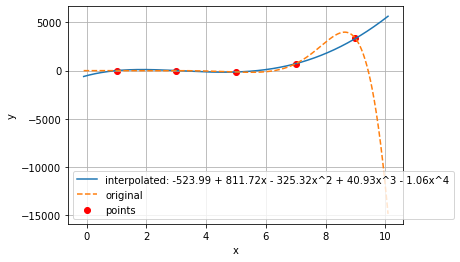

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math

def drawGraph(coefs, X, F):
    xs = np.arange(X[0] - 0.1, X[-1] + 0.1, 0.01)
    fs = []

    for x in xs:
        val = 0
        p = 1
        for i in range(len(coefs)):
            val += p*coefs[i]
            p *= x
    
        fs.append(val)
    
    fig, ax = plt.subplots()
    
    ax.plot(xs, fs, label = "interpolated")
    ax.scatter(X, F, color = "red", label = "original")

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    ax.grid()
    ax.legend()
    
    plt.show()

def Lagrange(F, X, x):
    n = len(F)
    
    L = 0
    
    for k in range(n):
        P = 1
        for j in range(n):
            if k != j:
                P = P * (x - X[j])/(X[k]-X[j])
        
        L += F[k] * P
        
    return L

def Lagrange_coef(X, F):
    n = len(F)
    
    L = []
    
    for k in range(n):
        P = np.array([0 for i in range(2*n)])
        P[0] = 1
        P[1] = 0
        for j in range(n):
            if k != j:
                a = 1/(X[k]-X[j])
                b = -X[j]/(X[k]-X[j])
                
                P = np.polymul(P, [b, a]);
        L = np.polyadd(L, P * F[k])
        
    return L

def printPol(coefs):
    items = []
    for i, x in enumerate((coefs)):
        if not x:
            continue
        items.append('{}x^{}'.format("{0:0.2f}".format(x) if x != 1 or i == 0 else '', i))
    result = ' + '.join(items)
    result = result.replace('x^0', '')
    result = result.replace('^1 ', ' ')
    result = result.replace('+ -', '- ')
    
    return result

def Lagrange_approximate(Func, a, b, n):
    DX = (b - a)/ n
    
    xs = np.arange(a - 0.1, b + 0.1, 0.01)
    fs = []
    fsl = []
    
    X = np.arange(a, b, DX)
    X = X + DX / 2
    F = np.array([Func(x) for x in X])
    
    for x in xs:
        fs.append(Func(x))
        fsl.append(Lagrange(F, X, x))

    fig, ax = plt.subplots()
    
    ax.plot(xs, fsl, label = "interpolated: " + printPol(Lagrange_coef(X, F)))
    ax.plot(xs, fs, '--', label = "original")
    ax.scatter(X, F, color = "red", label = "points")

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    ax.grid()
    ax.legend()
    
    plt.show()
    
    printPol(Lagrange_coef(X, F))

def F(X):
    return math.exp(X)*math.sin(X)
    
print("Lagrange approximation function: f(x) = exp(x)sin(x)")
print("Input interval [a, b] and points count N...")
a = 0#float(input())
b = 10#float(input())
n = 5#int(input())

Lagrange_approximate(F, a, b, n)

Lagrange approximation function: f(x) = exp(x)sin(x)
Input interval [a, b] and points count N...
Add point X...


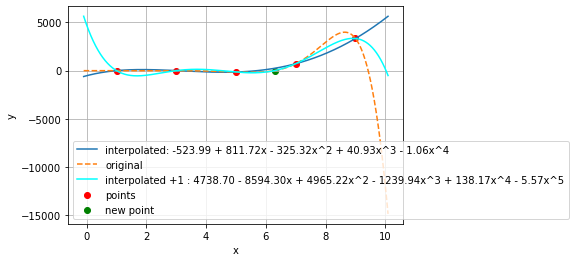

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

def printPol(coefs):
    items = []
    for i, x in enumerate((coefs)):
        if not x:
            continue
        items.append('{}x^{}'.format("{0:0.2f}".format(x) if x != 1 or i == 0 else '', i))
    result = ' + '.join(items)
    result = result.replace('x^0', '')
    result = result.replace('^1 ', ' ')
    result = result.replace('+ -', '- ')
    
    return result

def DividedDifference(X, F, k):
    val = 0
    for i in range(k+1):
        vv = F[i]
        for j in range(k+1):
            if j != i:
                vv /= (X[i]-X[j])
        val += vv
    return val

def Newton(X, F):
    n = len(X)
    
    P = np.poly1d([0])

    for i in range(n):
        D = np.poly1d([1])
        for j in range(0, i):
            D = np.polymul(D, np.poly1d([1, -X[j]]))

        P = np.polyadd(P, D * DividedDifference(X, F, i))

    return P.coeffs[::-1]

def Newton_add(X, F, P):
    Q = np.poly1d(P[::-1])
    n = len(X)

    D = np.poly1d([1])
    for j in range(0, n-1):
        D = np.polymul(D, np.poly1d([1, -X[j]]))

    Q = np.polyadd(Q, D * DividedDifference(X, F, n-1))

    return Q.coeffs[::-1]

def Newton_approximate(Func, a, b, n):
    DX = (b - a)/ n
    
    xs = np.arange(a - 0.1, b + 0.1, 0.01)
    fs = []
    fsl = []
    
    X = np.arange(a, b, DX)
    X = X + DX / 2
    
    F = np.array([Func(x) for x in X])
    
    coefs = Newton(X, F)
    
    for x in xs:
        fs.append(Func(x))
        p = 1
        V = 0
        for c in coefs:
            V += c * p
            p *= x
        fsl.append(V)

    fig, ax = plt.subplots()
    
    ax.plot(xs, fsl, label = "interpolated: " + printPol(coefs))
    ax.plot(xs, fs, '--', label = "original")
    ax.scatter(X, F, color = "red", label = "points")

    # add point
    print("Add point X...")
    g = 6.3#float(input())
    X = np.append(X, g)
    F = np.append(F, Func(X[-1]))
    
    coefs = Newton_add(X, F, coefs)

    fsl = []

    for x in xs:
        fs.append(Func(x))
        p = 1
        V = 0
        for c in coefs:
            V += c * p
            p *= x
        fsl.append(V)
        
    ax.plot(xs, fsl, color = "cyan", label = "interpolated +1 : " + printPol(coefs))
    ax.scatter([X[-1]], [F[-1]], color = "green", label = "new point")

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    ax.grid()
    ax.legend()
    
    plt.show()
    
def F(X):
    return math.exp(X)*math.sin(X)
    
print("Lagrange approximation function: f(x) = exp(x)sin(x)")
print("Input interval [a, b] and points count N...")
a = 0#float(input())
b = 10#float(input())
n = 5#int(input())

Newton_approximate(F, a, b, n)

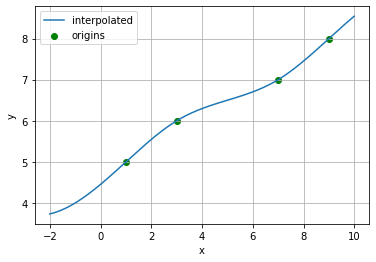

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

class Spline:
    def __init__(self, a, b, c, d, x):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.x = x
 

def BuildSpline(x, y):
    n = len(x)
    
    splines = [Spline(0, 0, 0, 0, 0) for i in range(0, n)]
    for i in range(0, n):
        splines[i].x = x[i]
        splines[i].a = y[i]
    
    splines[0].c = 0.0
    splines[n - 1].c = 0.0
    
    # SLAE
    alpha = [0.0 for i in range(0, n - 1)]
    beta = [0.0 for i in range(0, n - 1)]
 
    for i in range(1, n - 1):
        hi  = x[i] - x[i - 1]
        hi1 = x[i + 1] - x[i]
        A = hi
        C = 2.0 * (hi + hi1)
        B = hi1
        F = 6.0 * ((y[i + 1] - y[i]) / hi1 - (y[i] - y[i - 1]) / hi)
        z = (A * alpha[i - 1] + C)
        alpha[i] = -B / z
        beta[i] = (F - A * beta[i - 1]) / z
  
 
    # reverse
    for i in range(n - 2, 0, -1):
        splines[i].c = alpha[i] * splines[i + 1].c + beta[i]
    
    # find other
    for i in range(n - 1, 0, -1):
        hi = x[i] - x[i - 1]
        splines[i].d = (splines[i].c - splines[i - 1].c) / hi
        splines[i].b = hi * (2.0 * splines[i].c + splines[i - 1].c) / 6.0 + (y[i] - y[i - 1]) / hi
        
    splines[0] = splines[1]
    return splines
 
 
def Cubic(splines, x):
    n = len(splines)
    s = Spline(0, 0, 0, 0, 0)
    
    if x <= splines[0].x: 
        s = splines[0]
    elif x >= splines[n - 1].x:
        s = splines[n - 1]
    else:
        for i in range(len(splines)):
            if splines[i].x > x:
                s = splines[i]
                break
    
    dx = x - s.x
    return s.a + (s.b + (s.c / 2.0 + s.d * dx / 6.0) * dx) * dx;
    
 
x = [1, 3, 7, 9]
y = [5, 6, 7, 8]
 
spline = BuildSpline(x, y)
xs = np.arange(-2, 10, 0.01)
fs = [Cubic(spline, x) for x in xs]
fig, ax = plt.subplots()
plt.scatter(x, y, color="green", label="origins")
plt.plot(xs, fs, label="interpolated")
ax.set_xlabel("x")
ax.set_ylabel("y")
    
ax.grid()
ax.legend()
plt.show()